In [1]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

Load data

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data () #splitting the mnist data into train and test


11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

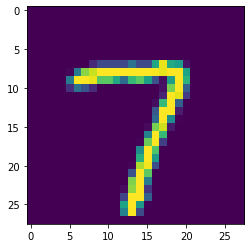

In [5]:
plt.imshow(x_train[5100])     #ploting the index=image

In [6]:
np.argmax(y_train[5100])

0

Reshaping Dataset

In [7]:
#Reshaping to format which CNN expects (batch, height, width, channels)
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

Applying One Hot Encoding

In [8]:
number_of_classes = 10  #storing the no of classes in a variable

In [9]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

Add CNN Layers

In [10]:
#create model
model=Sequential ()

In [11]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [12]:
#flatten the dimension of the image
model.add(Flatten())

In [13]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

Compiling the model

In [14]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [15]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Train the model

In [16]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 207s 110ms/step - loss: 0.2099 - accuracy: 0.9529 - val_loss: 0.0962 - val_accuracy: 0.9707
Epoch 2/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0714 - accuracy: 0.9783 - val_loss: 0.0950 - val_accuracy: 0.9721
Epoch 3/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0520 - accuracy: 0.9841 - val_loss: 0.0853 - val_accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 216s 115ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.1122 - val_accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.1054 - val_accuracy: 0.9776


Observing the metrics

In [17]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10539815574884415, 0.9775999784469604]


Test The Model

In [18]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 114ms/step
[[1.3562190e-15 9.6845727e-19 5.0561121e-11 3.6072711e-07 4.7390981e-06
  1.0210277e-10 5.8471827e-20 3.8339590e-07 3.0406005e-07 9.9999416e-01]]


TypeError: ignored

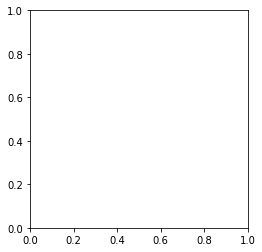

In [19]:
plt.imshow(x_test[6000])

In [20]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [21]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

Save The model

In [22]:
# Save the model
model.save('models/mnistCNN.h5')

In [23]:
cd models

/content/models


In [24]:

!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [25]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


In [26]:
!pip install watson-machine-learning-client --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 4.1 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 132 kB 52.5 MB/s 
     |████████████████████████████████| 9.9 MB 42.9 MB/s 
     |████████████████████████████████| 79 kB 6.0 MB/s 
     |████████████████████████████████| 140 kB 58.3 MB/s 
     |████████████████████████████████| 956 kB 51.6 MB/s 
     |████████████████████████████████| 135 kB 66.5 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=611595eccc2675f424ca72c8c589d28868b6827067946ad90b6b3157c89cf9af
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=5ccc7320726

In [28]:
pip install APIClient

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for APIClient: filename=apiclient-1.0.4-py3-none-any.whl size=5211 sha256=4dad286526ac8ab96ff90df36c3736e3f1cd45f74769441a62810c314acb340c
  Stored in directory: /root/.cache/pip/wheels/c7/9d/f6/110cd0d23b715dcabe2922456c5736f4b292cd1bfefde26a5e
Successfully built APIClient


In [30]:
pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.2 MB/s 
     |████████████████████████████████| 51 kB 652 kB/s 
     |████████████████████████████████| 824 kB 38.4 MB/s 
     |████████████████████████████████| 133 kB 49.1 MB/s 
     |████████████████████████████████| 547 kB 39.3 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=6db9b2ba2d91043570c8acbdfa3bcc126d1b35bae7025f6320424e12eeb771a0
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=321e91b20063fd580e221e22f6224e453edaa02e46f6a8da63546669c75ebd94
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

Cloud deploy

In [31]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"Qxwy3byu83al_Lvmk05S2xcRhHqeQiy_4BxWzPcxuB9A"
}
client = APIClient(credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [32]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/14d571ceb9ec45fe98e6eac22b1fe65f:a2858581-aa42-498f-8101-3cb5eeb52609::',
      'guid': 'a2858581-aa42-498f-8101-3cb5eeb52609',
      'name': 'Watson Machine Learning-vu',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'hdr',
    'scope': {'bss_account_id': '14d571ceb9ec45fe98e6eac22b1fe65f'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '98aa0e16-84dc-4ca5-af32-24752ee67208',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '4c745639eeba4adb8d2f56fd2b57f351',
        'api_key': 'T16lCcwdvCpz4BUdQtm0QnMRtUmxyj_w78zt6doIpCx8',
        'secret_access_key': 'dde37ce0ae17d50ee939028eda9f9c44d20b54bcc2f9f67c',
        'service_id': 'ServiceId-8758d9a8-8ee7-40b6-a087-94e890958f1f'},
       'editor': {'access_key_id': '39926bf2c3864cf1812a88a8c661777b',
        'api_key': '6zyoE

In [33]:

def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [34]:
space_uid = guid_from_space_name(client,'hdr')
print("Space UID = " + space_uid)

Space UID = ad4acd34-c854-43ef-8fa2-0e31b3b4a474


In [35]:
client.set.default_space(space_uid)

'SUCCESS'

In [36]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [38]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [39]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [40]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-13T06:15:20.237Z',
  'id': '7a3427ca-e48c-4c45-b095-cbf5e0a95a3c',
  'modified_at': '2022-11-13T06:15:24.852Z',
  'name': 'Digit Recognition System',
  'owner': 'IBMid-667000BZM2',
  'resource_key': 'f1e012a0-f1f0-4aa9-b3cc-e7e79c1dab10',
  'space_id': 'ad4acd34-c854-43ef-8fa2-0e31b3b4a474'},
 'system': {'warnings': []}}

In [41]:
model_id = client.repository.get_model_id(model_details)
model_id

'7a3427ca-e48c-4c45-b095-cbf5e0a95a3c'

In [42]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/content/models/DigitRecog_IBM_model.tar.gz'

In [43]:
ls

DigitRecog_IBM_model.tar.gz  hdr_deployment.tgz  mnistCNN.h5


Test Model

In [44]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np


In [45]:
model = load_model("mnistCNN.h5")

In [61]:
!apt get install Config

!apt get  install botocore


E: Invalid operation get
E: Invalid operation get


In [63]:
!apt get -qq -y install ibm_boto3

E: Invalid operation get


In [ ]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1rEQ4QsDyr45SbIYkkmEXGolFpDjMBjlc1KmxrsH2V1U',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'digitrecognition-donotdelete-pr-kvpefjqsoxebrc'
object_key = '4.jpg'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']


In [64]:
hist = model.fit(x_train, y_train,batch_size=20,epochs=5,verbose=1,validation_data=(x_test, y_test))

Epoch 1/5
3000/3000 [==============================] - 229s 76ms/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.1103 - val_accuracy: 0.9763
Epoch 2/5
3000/3000 [==============================] - 222s 74ms/step - loss: 0.0310 - accuracy: 0.9910 - val_loss: 0.1350 - val_accuracy: 0.9762
Epoch 3/5
3000/3000 [==============================] - 224s 75ms/step - loss: 0.0274 - accuracy: 0.9921 - val_loss: 0.1730 - val_accuracy: 0.9717
Epoch 4/5
3000/3000 [==============================] - 230s 77ms/step - loss: 0.0314 - accuracy: 0.9923 - val_loss: 0.1753 - val_accuracy: 0.9751
Epoch 5/5
3000/3000 [==============================] - 227s 76ms/step - loss: 0.0224 - accuracy: 0.9941 - val_loss: 0.1910 - val_accuracy: 0.9750
